In [1]:
#!pip install pillow
from IPython.display import SVG, display
from PIL import Image

In [2]:
import adijif
import pprint

vcxo = 125000000

clk = adijif.hmc7044()

clk.n2 = 24

output_clocks = [1e9, 500e6, 7.8125e6]
output_clocks = list(map(int, output_clocks))  # force to be ints
clock_names = ["ADC", "FPGA", "SYSREF"]

clk.set_requested_clocks(vcxo, output_clocks, clock_names)

clk.solve()

o = clk.get_config()

pprint.pprint(o)



self._vcxo_doubler [1, 2]
{'n2': 24,
 'out_dividers': [3, 6, 384],
 'output_clocks': {'ADC': {'divider': 3, 'rate': 1000000000.0},
                   'FPGA': {'divider': 6, 'rate': 500000000.0},
                   'SYSREF': {'divider': 384, 'rate': 7812500.0}},
 'r2': 1,
 'vco': 3000000000.0,
 'vcxo': 125000000,
 'vcxo_doubler': 1}


Saved to clocks.d2


2025-02-01 00:12:54.220 [INFO]	(stdlib)	<log/slog/handler.go:117>	(*defaultHandler).Handle	2025/01/31 17:12:54 INFO runme
2025-02-01 00:12:54.242 [WARN]	(default)	<oss.terrastruct.com/d2/lib/log/log.go:31>	from	missing slog.Logger in context, see lib/log.With ...
  "stack": goroutine 17 [running, locked to thread]:
           runtime/debug.Stack()
           	/usr/local/go/src/runtime/debug/stack.go:26 +0x5e
           oss.terrastruct.com/d2/lib/log.from({0x7ad0ef854310, 0x7ad0eff0c5a0})
           	/home/tcollins/go/pkg/mod/oss.terrastruct.com/d2@v0.6.5/lib/log/log.go:31 +0xeb
           oss.terrastruct.com/d2/lib/log.Debug({0x7ad0ef854310, 0x7ad0eff0c5a0}, {0x7ad0eeb1d68e, 0xe}, {0xc00027ba70, 0x2, 0x2})
           	/home/tcollins/go/pkg/mod/oss.terrastruct.com/d2@v0.6.5/lib/log/log.go:52 +0x6f
           oss.terrastruct.com/d2/d2layouts.LayoutNested({0x7ad0ef854310, 0x7ad0eff0c5a0}, 0xc000160d00, {0x0?, {0x0?, 0x0?}}, 0x7ad0ef848b80, 0x7ad0ef848c08)
           	/home/tcollins/go/pkg

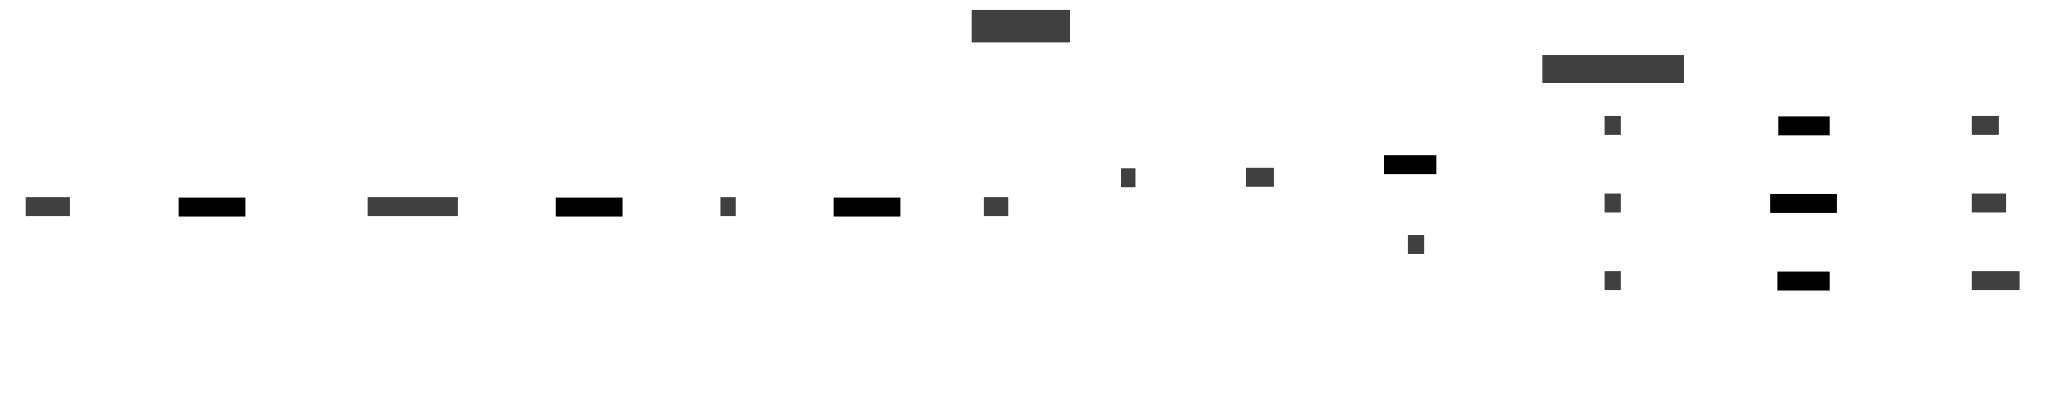

In [3]:
image_data = clk.draw()
display(SVG(image_data))
